# Homework: Titanic survival dataset exploration

Your goal is to fill #TODO places with your code and answer questions  

Here are some features that can help you determine who survived in Titanic.  
Our quality metric - area under the roc curve

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

SEED = 1337
# !!you should use that seed in all models which accepts random_state

In [116]:
df = pd.read_csv('./train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## fill missing values

In [117]:
# TODO 1:
# encode Sex column
# hint: use LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [118]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [119]:
# print columns with missing values
for name in df.columns:
    print(name, np.sum(pd.isnull(df[name])))

Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [120]:
# Replace missing values with "unkown"
df.loc[df.Cabin.isnull(), 'Cabin'] = 'unknown'

# fill Fare with median value
df.loc[ np.isnan(df['Fare']), 'Fare'] = df['Fare'].median()

# TODO 2
# Replace missing values in Embarked column with most common port
# hint: use Series.mode method
df.loc[ df.Embarked.isnull(), 'Embarked' ] = df['Embarked'].mode()[0]

In [121]:
# TODO 3
# train Random Forest regression model to fill missing values in Age column
# use  100 estimators, set oob_score in True, other params by default
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

age_columns = ['Age', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 
       'Fare', 'Embarked']

age_df = df[age_columns]

age_df['Embarked'] = preprocessing.LabelEncoder().fit_transform(age_df['Embarked'])
train_df = age_df.loc[age_df.Age.notnull()]
test_df = age_df.loc[age_df.Age.isnull()]
y_train = train_df['Age']
train_df.drop(['Age'],inplace=True,axis=1)


model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=1337).fit(train_df, y_train)
print(model.oob_score_)

df.loc[df.Age.isnull(), 'Age'] = model.predict(test_df.drop(['Age'],axis=1))

/Users/Kartozianstvo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/Kartozianstvo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0.219916672115


### Question 1: what is the oob_score of trained model?
I'm not sure what is expected in this answer: definition or score, so I will give both:

* oob_score: 0.219916672115 

* The out-of-bag (OOB) error is the average error for each z(i) calculated using predictions from the trees that do not contain z(i) in their respective bootstrap sample. This allows the Random Forest to be fit and validated whilst being trained

## feature transformation

In [122]:
# TODO 4
# Create a dataframe of dummy variables for each distinct value of Embarked
# hint: use DataFrame.get_dummies method


# Rename the columns from 'S', 'C', 'Q' to 'Embarked_S', 'Embarked_C', 'Embarked_Q'
# hint: use pandas.rename method

# Add the new dummy variables back to the original data set
# hint: use pandas.concat method
#dummies = pd.get_dummies(df['Embarked'])
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis= 1, ignore_index=False)
df = df.rename(index=str, columns={"S": "Embarked_S", "C": "Embarked_C", "Q": "Embarked_Q"})
#df
df['Embarked'] = preprocessing.LabelEncoder().fit_transform(df['Embarked'])

In [123]:
import re
# TODO 5

# create feature for the alphabetical part of the cabin number
# hint: use re module
 
# convert the distinct cabin letters with incremental integer values
# hint: use pandas.factorize method
def get_letter(cabin):
    match = re.search("([a-zA-Z]+)", str(cabin))
    if match:
        return match.group()
    else:
        return 'U'
    
df['CabinLetter'] = df['Cabin'].apply(lambda x: get_letter(x))
df['Cabin'].value_counts
df.loc[df.CabinLetter.isnull(), 'CabinLetter'] = 'unknown'
df.loc[df.Cabin.isnull(), 'Cabin'] = 'unknown'
df['Cabin'] = preprocessing.LabelEncoder().fit_transform(df['Cabin'])
df['CabinLetter'] = preprocessing.LabelEncoder().fit_transform(df['CabinLetter'])

In [124]:
# TODO 6

# Divide all fares into quartiles
# hint: use pandas.qcut

# create dummies from the result and add them to dataset
dummies = pd.get_dummies(pd.qcut(df['Fare'], 4))
dummies.columns = dummies.columns.astype(str)
df = pd.concat([df, dummies], ignore_index=False)

In [125]:
df = df.drop(['Name', 'Ticket'], axis=1)
df.shape

(1782, 17)

In [126]:
df = df.fillna(0)

In [163]:
from sklearn.decomposition import PCA
# TODO 7
# make dimension reduction with PCA, leave enough components to explain 98% variance of the data, 
# other params by default. Project dataset on these components
# Of course, you should not project your target variable
X = df
#X['CabinLetter'] = le.fit_transform(X['CabinLetter'])
#X['Embarked'] = le.fit_transform(X['Embarked'])
V = 0
while V <0.98:
    pca = PCA(n_components=14)
    X_pca = pca.fit_transform(X)
    V = pca.explained_variance_ratio_
    print(np.sum(V))

0.99999903695


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Question 2: how many components are in PCA?
14

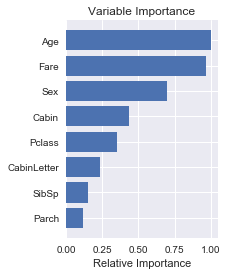

In [161]:
# TODO 8
# plot feature importances from Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


X = df.drop('Survived', axis=1)
y = df.Survived.values
features_list = X.columns
X = X.as_matrix()
 
# Train Random Forest Classifier on datasert with 5000 trees, other params by default
# get feature importances from model
forest = RandomForestClassifier(oob_score=True, n_estimators=5000)
forest.fit(X, y)
feature_importance = forest.feature_importances_
 
# make importances relative to max importance
feature_importance = feature_importance / feature_importance.max()
 
# A threshold below which to drop features from the final data set. Specifically, this number represents
# the percentage of the most important feature's importance value
fi_threshold = 0.10
 
# Get the indexes of all features over the importance threshold

important_idx = np.where(feature_importance > fi_threshold)[0]
 
# Create a list of all the feature names above the importance threshold
important_features = features_list[important_idx]
 
# Get the sorted indexes of important features
sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
 

pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], align='center')
plt.yticks(pos, important_features[sorted_idx[::-1]])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.draw()
plt.show()

# Remove non-important features from the feature set
X = df[important_features]

### Question 3: What are 4 top most important features?##
Age, Fare, Sex and Cabin

In [164]:
# stack features

X = np.hstack([X, X_pca])
X.shape

(1782, 31)

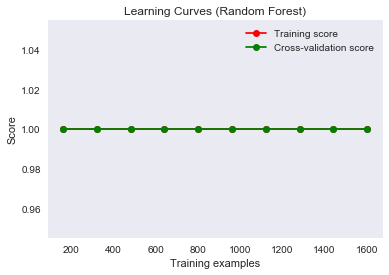

In [168]:
# TODO 9 
# plot learning curves for Random Forest Model (for train and test)
# hint: look at sklearn.learning_curve module. Look at the docs
# use Random Forest with 500 trees, 10-fold cross-validation for roc_auc scoring.
from sklearn.learning_curve import learning_curve

forest = RandomForestClassifier(n_estimators=500)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
cv = 10
plot_learning_curve(forest, title, X, y, cv=cv)
plt.show()
#whyyyyy

In [ ]:
# TODO 10
# plot roc auc curve for Random Forest for test dataset
# hint: use roc_curve and auc functions from sklearn.metrics
# use Random Forest with 5000 trees
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve')
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

### Question 4: What is the roc auc score on test dataset ? 